<a href="https://colab.research.google.com/github/nodeswithsumit/Predictive-Analytics/blob/main/Predicitve_Analytics_%26_Big_Data_Analaytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Welcome :)

Platforms from where you can collect datasets:

1. Kaggle.com [https://www.kaggle.com/]
2. Google Datasets [https://datasetsearch.research.google.com/]
3. ML UCI Repository [https://archive.ics.uci.edu/]
4. Govt Data Platform [https://www.data.gov.in/]

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print("Target = ", data.target)

Target =  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
print('Target Names: ', data.target_names)
print('Feature Names', data.feature_names)

Target Names:  ['setosa' 'versicolor' 'virginica']
Feature Names ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print('Rows & Cols in Data : ', data.data.shape)

Rows & Cols in Data :  (150, 4)


In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

# metadata
print(iris.metadata)

# variable information
print(iris.variables)


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

# Detailed Explanation of KNN:
**K-Nearest Neighbors** is an algorithm for supervised learning. Where the data is 'trained' with data points corresponding to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification. It works as follows:

**Distance Calculation:** For a given test point, KNN computes the distance between the test point and all other points in the training set using a distance metric (usually Euclidean).
Find Nearest Neighbors: The algorithm identifies the k closest points to the test point.

**Vote:** For classification, the most common class among the k nearest neighbors is assigned to the test point.

**Impact of  k on KNN:**
* Small k Values: A small k makes the model sensitive to noise in the data, potentially leading to overfitting.
* Large k Values: A larger k increases bias by averaging the influence of more neighbors, which may smooth over important distinctions in the data.
* Optimal k: The optimal k balances bias and variance, leading to better generalization on unseen data.




### Here's an visualization of the K-Nearest Neighbors algorithm.

<img src="https://ibm.box.com/shared/static/mgkn92xck0z05v7yjq8pqziukxvc2461.png">

In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points) we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A.


In this sense, it is important to consider the value of k. But hopefully from this diagram, you should get a sense of what the K-Nearest Neighbors algorithm is. It considers the 'K' Nearest Neighbors (points) when it predicts the classification of the test point.


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# About dataset

This is one of the earliest datasets used in the literature on classification methods and widely used in statistics and machine learning.  The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  One class is linearly separable from the other 2; the latter are not linearly separable from each other.

**Predicted attribute:** class of iris plant.

This is an exceedingly simple domain.

This data differs from the data presented in Fishers article (identified by Steve Chadwick,  spchadwick@espeedaz.net ).  The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.  

In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [ ]:
# Convert to DataFrame for easier visualization
df = pd.DataFrame(X, columns=feature_names)
df['species'] = pd.Categorical.from_codes(y, target_names)

# Display first few rows of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1jx0uDZBlonV6Pk1GzQLkTVERZfhBesY5qSOCV2AzyME#gid=0


**Explanation:**
Loading the Iris Dataset: The Iris dataset contains measurements of 150 Iris flowers, with 4 features: sepal length, sepal width, petal length, and petal width. The target variable is the species of the Iris flower.

**DataFrame Conversion:** We convert the data into a pandas DataFrame to make visualization easier and more intuitive.


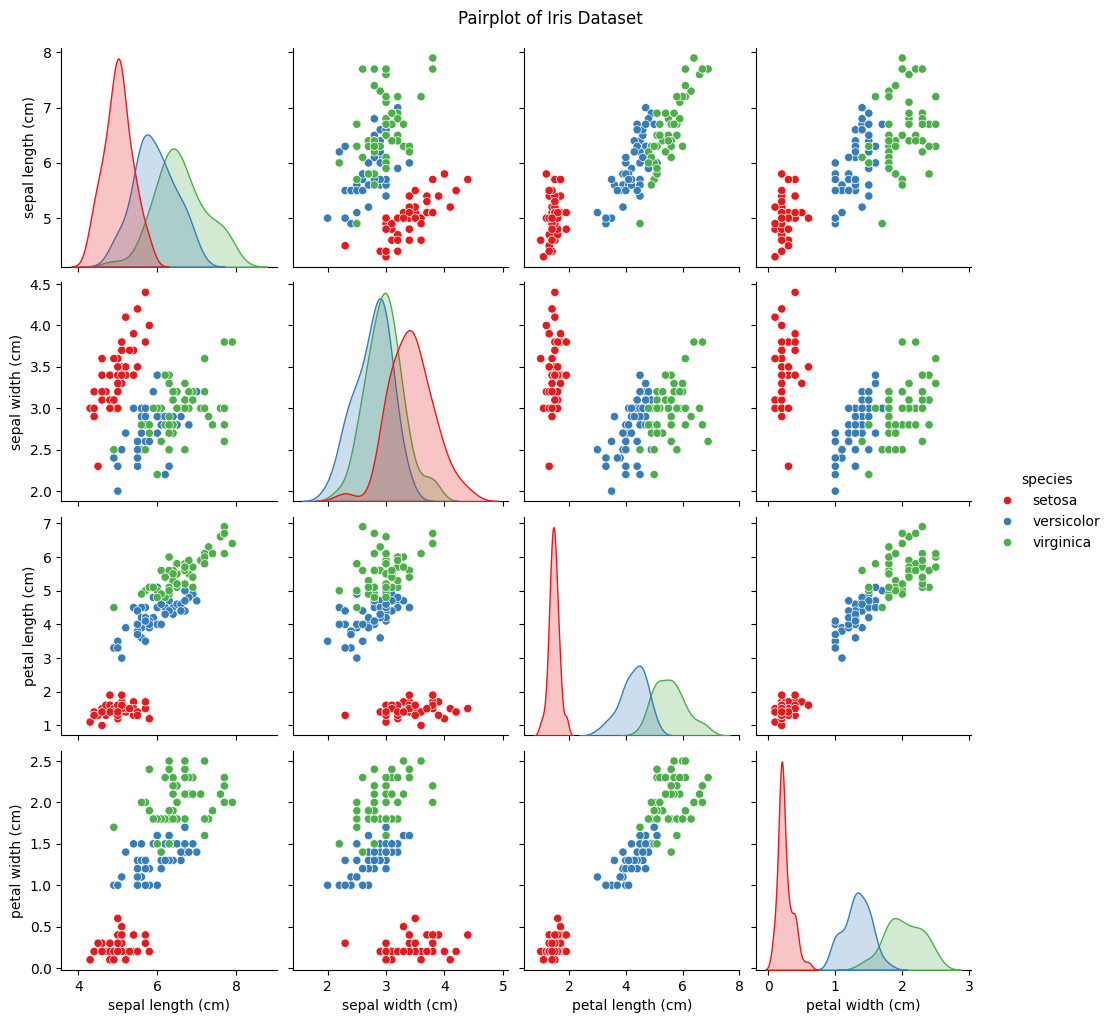

In [ ]:
# Visualizing the dataset
sns.pairplot(df, hue='species', palette="Set1")
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()


**Explanation:**
Pairplot: A pairplot is used to visualize relationships between pairs of features. The points are colored according to the Iris species, helping to visually inspect the separability of different species.

## Preprocessing:
Now we will split the data into training and testing sets and standardize the features to help improve the KNN model's performance.

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Explanation:**
Train-Test Split: The dataset is split into 70% training data and 30% testing data.

**Standardization:** Standardization is applied so that each feature has a mean of 0 and a standard deviation of 1. This ensures that the distance calculations in KNN are not dominated by features with larger scales.

# Building and Evaluating KNN Model:
Next, we'll build the KNN model with various values of 𝑘 and observe how the accuracy changes.

In [ ]:
# Function to calculate accuracy for different values of k
def evaluate_knn(k_values, X_train, X_test, y_train, y_test):
    accuracy_scores = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)
    return accuracy_scores

In [ ]:
# K values to evaluate
k_values = range(1, 21)

# Evaluate KNN for different k values
accuracy_scores = evaluate_knn(k_values, X_train, X_test, y_train, y_test)

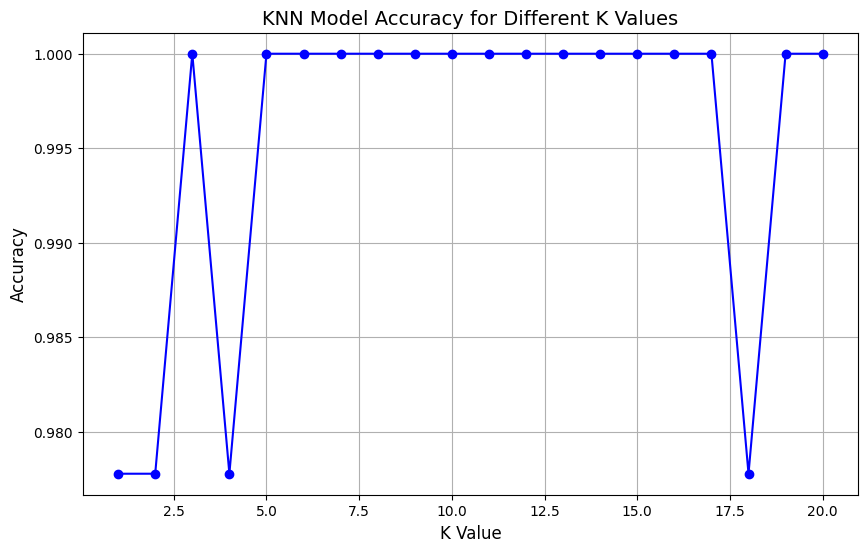

In [ ]:
# Plotting the accuracy as a function of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('KNN Model Accuracy for Different K Values', fontsize=14)
plt.xlabel('K Value', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True)
plt.show()

**Explanation:**
Accuracy vs. K Values: We create a function to train the KNN model for different values of 𝑘 and calculate the accuracy. The plot shows how accuracy changes as we vary 𝑘 helping us identify the optimal value.

# Visualiazing and Predicting

In [ ]:
#creating the model with k = 10 as i see the k reamins in a straight line for some time atleast.
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

# do the prediciton
y_pred = knn.predict(X_test)

# calculate the acc we can done this earlier also if u can see above code.
accuracy = accuracy_score(y_test, y_pred)
accuracy_scores.append(accuracy)
accuracy_scores

[0.9777777777777777,
 0.9777777777777777,
 1.0,
 0.9777777777777777,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9777777777777777,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9777777777777777,
 1.0]

[0.9777777777777777,
 0.9777777777777777,
 1.0,
 0.9777777777777777,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9777777777777777,
 1.0,
 1.0,
 1.0]